<a href="https://colab.research.google.com/github/skredenmathias/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2_make_features_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-10-29 20:09:28--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.62M   885KB/s    in 25s     

2019-10-29 20:09:53 (877 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22667400]



In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [0]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4122.15","4122.15","2081.76","2081.76","1477.85","603.91","0.0","0.0","0.0","Sep-2019","190.21","Oct-2019","Sep-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [0]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
print(df.shape)
df.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,...,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,25000,25000,25000.0,60 months,16.14%,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,...,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,26500,26500,26500.0,60 months,11.31%,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,...,7,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10400,10400,10400.0,36 months,12.98%,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,...,3,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,35000,35000,35000.0,60 months,12.98%,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,

In [0]:
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [0]:
df.isnull().sum().sort_values()

inq_fi                                             0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
total_cu_tl                                        0
total_rev_hi_lim                                   0
max_bal_bc                                         0
open_rv_24m                                        0
open_rv_12m                                        0
total_bal_il                                       0
open_il_24m                                        0
hardship_flag                                      0
open_act_il                                        0
open_acc_6m                                        0
tot_cur_bal                                        0
tot_coll_amt                                       0
acc_now_delinq                                     0
application_type                              

In [0]:
df1 = df.drop(['url', 'member_id', 'desc', 'id'], axis=1)

In [0]:
# convert int_rate
df['int_rate'][:10].iloc[0]

' 14.47%'

In [0]:
int_rate = ' 14.47%'

In [0]:
int_rate.strip("%")

' 14.47'

In [0]:
int_rate.strip()

'14.47%'

In [0]:
int_rate.strip().strip('%')

'14.47'

In [0]:
int_rate.replace('%', '').replace(' ','')

'14.47'

In [0]:
type(int_rate.strip().strip('%'))

str

In [0]:
type(float("4.58"))

float

In [0]:
def int_rate_to_float(int_rate_string):
  return float(int_rate_string.strip().strip('%'))

int_rate_to_float(int_rate)

14.47

In [0]:
df['int_rate'].apply(int_rate_to_float)

0         14.47
1         16.14
2         11.31
3         12.98
4         12.98
          ...  
128407    15.02
128408    15.02
128409    13.56
128410    11.06
128411    16.91
Name: int_rate, Length: 128412, dtype: float64

In [0]:
df1['int_rate'] = df['int_rate'].apply(int_rate_to_float)
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,20000,20000,20000.0,36 months,14.47,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,8,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,25000,25000,25000.0,60 months,16.14,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,7,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,26500,26500,26500.0,60 months,11.31,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,7,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10400,10400,10400.0,36 months,12.98,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,3,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,35000,35000,35000.0,60 months,12.98,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,S

In [0]:
# Clean up emp_title

df.shape

(128412, 144)

In [0]:
df['emp_title'][:10]

0                                  bus driver
1                          Production Manager
2                         Compliance Director
3                  Program Support Assistant 
4            Sr. Vice President -Risk Manager
5                                     Teacher
6                        Help Tech Supervisor
7    Assistant Athletic Director of Marketing
8                      Transportation Manager
9                                  Pharmacist
Name: emp_title, dtype: object

In [0]:
df['emp_title'].value_counts(dropna=False)[:20]

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [0]:
import numpy as np

type(np.NaN)

float

In [0]:
# get number of unique job titles

len(df['emp_title'].value_counts())

43892

In [0]:
df['emp_title'].isnull().sum()

20947

In [0]:
examples = ["owner", 'Supervisor', ' Project Manager', np.NaN]

In [0]:
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title() # What exactly is happening here
  else:
    return "Unknown"
[clean_title(item) for item in examples] # Have me go over this

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
df1['emp_title'].value_counts(dropna=False)[:20]

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [0]:
len(df['emp_title'].value_counts())

43892

In [0]:
# Create emp_title_manager

df1['emp_title_manager'] = df['emp_title'].str.contains('Manager')

df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,20000,20000,20000.0,36 months,14.47,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,25000,25000,25000.0,60 months,16.14,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
2,26500,26500,26500.0,60 months,11.31,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
3,10400,10400,10400.0,36 months,12.98,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
4,35000,35000,35000.0,60 months,12.98,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolida

In [0]:
condition = (df1['emp_title_manager'] == True)
condition

0         False
1          True
2         False
3         False
4          True
          ...  
128407    False
128408    False
128409    False
128410    False
128411     True
Name: emp_title_manager, Length: 128412, dtype: bool

In [0]:
managers = df1[condition]


In [0]:
managers.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
1,25000,25000,25000.0,60 months,16.14,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,5,10,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
4,35000,35000,35000.0,60 months,12.98,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,797xx,TX,15.09,0,Sep-1985,0,77.0,NaN,13,0,55944,74.9%,39,w,0.00,0.00,36266.741552,36266.74,35000.00,1266.74,0.0,0.0,0.0,Apr-2019,34712.60,NaN,Sep-2019,0,NaN,1,Joint App,272421.0,...,9,19,8,13,0.0,0,0,1,97.4,66.7,0,0,516204,82514,59700,51904,88364.0,Sep-1985,0.0,6.0,19.0,53.4,2.0,29.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
8,12000,12000,12000.0,36 months,11.80,397.43,B,B4,Transportation Manager,10+ years,RENT,79365.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,104xx,NY,29.70,0,Sep-1988,2,25.0,NaN,20,0,4957,27.8%,32,w,9383.91,9383.91,3565.070000,3565.07,2616.09,948.98,0.0,0.0,0.0,Sep-2019,397.43,Oct-2019,Sep-2019,0,35.0,1,Individual,NaN,...,12,20,11,20,0.0,0,0,7,81.3,0.0,0,0,103047,80734,6700,85247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
16,12000,12000,12000.0,36 months,16.14,422.72,C,C4,Sales Account Manager,4 years,RENT,70000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,333xx,FL,18.96,0,Nov-2013,0,NaN,NaN,6,0,13663,61.8%,7,w,9844.05,9844.05,3365.620000,3365.62,2155.95,1209.67,0.0,0.0,0.0,Sep-2019,422.72,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,4,5,4,6,0.0,0,0,2,100.0,66.7,0,0,56264,34470,18500,34164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
18,20400,20400,20400.0,60 months,10.33,436.76,B,B1,Bakery Manager,10+ years,MORTGAGE,140000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt

In [0]:
non_managers = df1[~condition]
non_managers.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,20000,20000,20000.0,36 months,14.47,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.74000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,4,14,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,26500,26500,26500.0,60 months,11.31,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.54000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,13,26,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
3,10400,10400,10400.0,36 months,12.98,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.63000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,6,7,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
5,20000,20000,20000.0,36 months,7.56,622.68,A,A3,Teacher,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,982xx,WA,18.92,0,Feb-1999,0,48.0,NaN,9,0,25416,29.9%,19,w,0.00,0.00,20215.79243,20215.79,20000.00,215.79,0.0,0.0,0.0,Feb-2019,20228.39,NaN,Feb-2019,0,NaN,1,Joint App,190000.0,...,5,9,5,9,0.0,0,0,1,94.7,20.0,0,0,622183,71569,85100,74833,43287.0,Aug-1998,0.0,3.0,10.0,29.7,2.0,7.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
6,13000,13000,13000.0,36 months,17.97,469.79,D,D1,Help Tech Supervisor,10+ years,MORTGAGE,92360.0,Source Verified,Dec-2018,Current,n,home_improvement,Home improvement,300xx,GA,27.

In [0]:
managers.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,...,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,1.407200e+04,14071.000000,14072.000000,14072.000000,6347.000000,1530.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,3273.000000,14072.0,1504.000000,1504.000000,14072.0,14072.000000,1.407200e+04,14072.000000,14072.00000,14072.000000,14072.000000,13775.000000,1.407200e+04,12386.000000,14072.000000,14072.000000,14072.000000,14069.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14070.000000,...,14072.000000,14072.000000,14072.000000,14072.000000,13963.000000,2846.000000,12486.000000,4122.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,14072.000000,13728.0,14072.0,14072.000000,14072.000000,14072.000000,13954.000000,14072.000000,14072.0,1.407200e+04,1.407200e+04,14072.000000,1.407200e+04,1504.000000,1504.000000,1504.00000,1504.000000,1487.000000,1504.000000,1504.000000,1504.000000,1504.000000,409.000000,7.0,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,22.000000,22.000000,22.000000
mean,17692.310972,17692.310972,17689.571489,12.654628,505.131804,9.516966e+04,19.095499,0.233940,0.445210,37.009296,87.502614,12.312322,0.109792,19821.158542,24.038019,12295.873852,12294.247246,6627.933242,6626.632897,5046.415272,1574.378624,0.603020,6.536326,1.176539,2149.981980,0.019400,47.044302,1.0,147585.355206,19.366523,0.0,193.478184,1.727682e+05,0.973636,3.06019,0.745168,1.718164,18.156298,4.071266e+04,68.060391,1.181353,2.501919,7077.199687,55.787547,44458.145324,1.162592,1.556637,1.928795,4.540932,15528.254442,...,175.004761,15.451606,8.192936,1.519613,25.859915,40.809909,7.522745,38.116206,0.491046,3.922541,5.706438,5.224986,7.456296,9.002771,8.562891,13.288019,5.674815,12.297968,0.0,0.0,0.057703,2.075540,94.572655,34.477282,0.109792,0.0,2.188568e+05,6.095830e+04,31501.951109,5.304716e+04,41396.894282,0.529255,1.71609,12.011968,55.864560,3.238697,12.619016,0.031915,0.057181,39.750611,3.0,229.568571,3.0,9.857143,688.705714,19425.000000,289.841429,8508.640455,51.826818,19.772727
std,10414.218294,10414.218294,10416.008955,5.046276,290.189897,1.016816e+05,11.260063,0.761143,0.733173,21.731589,20.74

In [0]:
managers['int_rate'].mean()

12.654628339965628

In [0]:
non_managers.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,...,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,1.143400e+05,114104.000000,114340.000000,114340.000000,49869.000000,13920.000000,114340.000000,114340.000000,1.143400e+05,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,25907.000000,114340.0,1.527800e+04,15278.000000,114340.0,114340.000000,1.143400e+05,114340.000000,114340.000000,114340.000000,114340.000000,110159.000000,1.143400e+05,95752.000000,114340.000000,114340.000000,114340.000000,114306.000000,1.143400e+05,114340.000000,114340.000000,114340.000000,114340.000000,114329.000000,...,114340.000000,114340.000000,114340.000000,114340.000000,112858.000000,22323.000000,99879.000000,32660.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,114340.000000,111825.0,114340.0,114340.000000,114340.000000,114340.000000,112766.000000,114340.000000,114340.0,1.143400e+05,1.143400e+05,114340.000000,1.143400e+05,1.527800e+04,15278.000000,15278.000000,15278.000000,15037.000000,15278.000000,15278.000000,15278.000000,15278.000000,4745.000000,62.0,62.000000,62.0,62.000000,60.000000,62.000000,62.000000,146.000000,146.000000,146.000000
mean,15759.516136,15759.516136,15756.683020,12.963463,458.099646,8.127465e+04,20.036478,0.227086,0.447263,36.863923,85.979310,11.471961,0.123334,1.653824e+04,22.509962,10951.802515,10950.067534,5886.805865,5885.521454,4452.176533,1425.489882,0.622995,8.516453,1.532961,1808.058078,0.017780,46.491450,1.0,1.321701e+05,19.212828,0.0,187.667527,1.435953e+05,0.935307,2.723281,0.682167,1.554758,20.457266,3.572580e+04,68.231337,1.197691,2.545566,5937.138980,54.115576,3.875748e+04,1.108650,1.515410,1.870526,4.363224,13619.182176,...,172.824725,15.429176,8.689855,1.298977,26.033015,40.364915,7.556593,37.779547,0.457924,3.627549,5.378153,4.839934,7.017903,8.200621,8.154452,12.814850,5.350840,11.454259,0.0,0.0,0.059708,2.003778,94.670574,32.705672,0.123203,0.0,1.847474e+05,5.265057e+04,26939.566250,4.605564e+04,3.617479e+04,0.591570,1.574486,11.379304,55.880242,3.006284,12.404700,0.036589,0.063555,38.409484,3.0,208.424194,3.0,15.322581,623.991500,15081.260806,252.768387,7050.087260,52.058699,17.849315
std,10097.233364,10097.23

In [0]:
non_managers['int_rate'].mean()

12.963463092532598

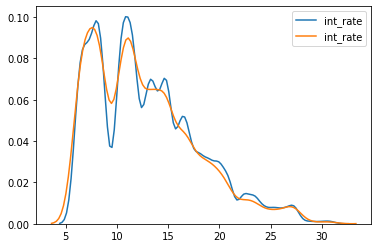

In [0]:
import seaborn as sns

sns.kdeplot(non_managers['int_rate'])
sns.kdeplot(managers['int_rate']);

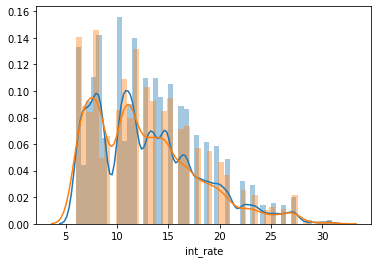

In [0]:
sns.distplot(non_managers['int_rate'])
sns.distplot(managers['int_rate']);

In [0]:
# dates

list(df.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [0]:
[col for col in df1 if col.endswith('_d')] # have me go over this

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
df1.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [0]:
df1['issue_d']

0         Dec-2018
1         Dec-2018
2         Dec-2018
3         Dec-2018
4         Dec-2018
            ...   
128407    Oct-2018
128408    Oct-2018
128409    Oct-2018
128410    Oct-2018
128411    Oct-2018
Name: issue_d, Length: 128412, dtype: object

In [0]:
df1['issue_d'] = pd.to_datetime(df1['issue_d'], infer_datetime_format=True)

In [0]:
df1.dtypes

loan_amnt                                              int64
funded_amnt                                            int64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                 

In [0]:
df1['issue_d']

0        2018-12-01
1        2018-12-01
2        2018-12-01
3        2018-12-01
4        2018-12-01
            ...    
128407   2018-10-01
128408   2018-10-01
128409   2018-10-01
128410   2018-10-01
128411   2018-10-01
Name: issue_d, Length: 128412, dtype: datetime64[ns]

In [0]:
df1['issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [0]:
df1['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
df1['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
128407    2018
128408    2018
128409    2018
128410    2018
128411    2018
Name: issue_d, Length: 128412, dtype: int64

In [0]:
df1['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
128407    10
128408    10
128409    10
128410    10
128411    10
Name: issue_d, Length: 128412, dtype: int64

In [0]:
df1['issue_year'] = df1['issue_d'].dt.year

In [0]:
df1['issue_month'] = df1['issue_d'].dt.month

In [0]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month
0,20000,20000,20000.0,36 months,14.47,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,4,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
1,25000,25000,25000.0,60 months,16.14,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,3,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True,2018,12
2,26500,26500,26500.0,60 months,11.31,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,Dec-2006,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,10,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
3,10400,10400,10400.0,36 months,12.98,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,Jul-2013,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,3,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
4,35000,35000,35000.0,60 months,12.98,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,2018-12-01,Fully Paid,n,debt_consolidati

In [0]:
df1.dtypes

loan_amnt                                              int64
funded_amnt                                            int64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                 

In [0]:
df1['earliest_cr_line'].head()

0    Jun-1979
1    Sep-2003
2    Dec-2006
3    Jul-2013
4    Sep-1985
Name: earliest_cr_line, dtype: object

In [0]:
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'], infer_datetime_format=True)

In [0]:
df1['days_from_earliest_credit_to_issue'] = (df1['issue_d'] - df1['earliest_cr_line']).dt.days

In [0]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue
0,20000,20000,20000.0,36 months,14.47,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,Sep-2019,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,6,NaN,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,14428
1,25000,25000,25000.0,60 months,16.14,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,Apr-2019,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,7,0.0,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True,2018,12,5570
2,26500,26500,26500.0,60 months,11.31,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,2006-12-01,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,Sep-2019,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,17,0.0,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,4383
3,10400,10400,10400.0,36 months,12.98,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,2013-07-01,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,Sep-2019,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,8,0.0,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,1979
4,35000,35000,35000.0,60 months,12.98,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,MORTGAGE,211646.0,Source Verified,2018-

In [0]:
df1['days_from_earliest_credit_to_issue'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64

In [0]:
25171.000000/365

68.96164383561644

In [0]:
# Convert the term column from string to integer.

# Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

# Make last_pymnt_d_month and last_pymnt_d_year columns.

In [0]:
df['term'].describe

<bound method NDFrame.describe of 0          36 months
1          60 months
2          60 months
3          36 months
4          60 months
             ...    
128407     36 months
128408     36 months
128409     36 months
128410     36 months
128411     36 months
Name: term, Length: 128412, dtype: object>

In [0]:
term_ex = [" 60 months", " 30 months"]

In [0]:
def term_to_int(term_string):
  return int(term_string.strip().strip(' months'))

# term_to_int(term_ex)

In [0]:
df1['term'].apply(term_to_int) # Success

In [0]:
# Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.

df1['loan_status'].head()

0       Current
1    Fully Paid
2       Current
3       Current
4    Fully Paid
Name: loan_status, dtype: object

In [0]:
loan_example = {
0:       Current
1:    Fully Paid
2:       Current
3:       Current
4:    Fully Paid}

In [0]:
# Attempt 1
def is_loan_paid(loan_great):
  if item in df1['loan_status'] == 'Current' or 'Fully Paid':
    return True
  else:
    return False


In [0]:
# Attempt 2
def is_loan_paid2(loan_sweet):
  if loan_sweet.contains('Current' or 'Fully Paid'):
    return 

In [0]:
# Attempt 3
def is_loan_paid3(loan_good):
  if any (loan_good == item for item in ('Current', 'Fully Paid'))

In [0]:
# Attempt 4
def is_loan_paid4(loan):
  if loan in [ 'Current', 'Fully Paid']:
    return 1
  else:
    return 0

In [0]:
df1['loan_status_is_great'] = df1['loan_status'].apply(is_loan_paid4)

NameError: ignored

In [0]:
# Attempt 5
df1['loan_status_is_great'] = df1['loan_status'].str.contains('Current|Fully Paid')

In [0]:
df1['loan_status_is_great'].head() # Write a little function that converts to 0 and 1

0    True
1    True
2    True
3    True
4    True
Name: loan_status_is_great, dtype: bool

In [0]:
# Make last_pymnt_d_month and last_pymnt_d_year columns.
df1['last_pymnt_d'] = pd.to_datetime(df1['last_pymnt_d'], infer_datetime_format=True)


In [0]:
df1['last_pymnt_d']

0        2019-09-01
1        2019-04-01
2        2019-09-01
3        2019-09-01
4        2019-04-01
            ...    
128407   2018-12-01
128408   2019-09-01
128409   2019-09-01
128410   2019-09-01
128411   2019-09-01
Name: last_pymnt_d, Length: 128412, dtype: datetime64[ns]

In [0]:
df1['last_pymnt_d_month'] = df1['last_pymnt_d'].dt.month

In [0]:
df1['last_pymnt_d_year'] = df1['last_pymnt_d'].dt.year

In [0]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue,last_pymnt_d_month,last_pymnt_d_year
0,20000,20000,20000.0,36 months,14.47,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,1979-06-01,2,15.0,NaN,6,0,15048,73%,22,w,15777.74,15777.74,6104.740000,6104.74,4222.26,1882.48,0.0,0.0,0.0,2019-09-01,688.13,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,0,0,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,14428,9.0,2019.0
1,25000,25000,25000.0,60 months,16.14,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,2003-09-01,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.167580,26653.17,25000.00,1653.17,0.0,0.0,0.0,2019-04-01,24857.33,NaN,May-2019,0,NaN,1,Individual,NaN,...,0,0,1,100.0,33.3,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True,2018,12,5570,4.0,2019.0
2,26500,26500,26500.0,60 months,11.31,580.28,B,B3,Compliance Director,10+ years,MORTGAGE,134000.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,747xx,OK,18.91,0,2006-12-01,2,NaN,NaN,17,0,43640,65.4%,37,w,23410.70,23410.70,5197.540000,5197.54,3089.30,2108.24,0.0,0.0,0.0,2019-09-01,580.28,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,0,0,4,100.0,66.7,0,0,430403,107975,49300,88875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,4383,9.0,2019.0
3,10400,10400,10400.0,36 months,12.98,350.32,B,B5,Program Support Assistant,10+ years,MORTGAGE,56099.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,800xx,CO,20.92,0,2013-07-01,2,32.0,67.0,8,1,1669,9.8%,10,w,8164.57,8164.57,3141.630000,3141.63,2235.43,906.20,0.0,0.0,0.0,2019-09-01,350.32,Oct-2019,Sep-2019,0,NaN,1,Individual,NaN,...,0,0,4,90.0,0.0,1,0,60709,39564,17000,43709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,1979,9.0,2019.0
4,35000,35000,35000.0,60 months,12.98,796.00,B,B5,Sr. Vice President -Risk Manager,7 years,M

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-10-29 21:09:07--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.165.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.165.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  12.9MB/s    in 14s     

2019-10-29 21:09:21 (14.4 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01
